In [382]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import ttest_ind, pearsonr


%matplotlib inline

In [383]:
data=pd.read_csv('D:\Desktop\programming\int\mmm_test_data_exercise.csv')

In [384]:
data.head()

,year_week,recipe_id,recipe_name,product_type,calories,carbs,cooking_time,cuisine,description,difficulty,...,dish_types,seasons,protein_types,proteins,course_type,cooking_tip,meta_tags,percentage_of_local_ingredients,protein_cuts,sales
0,201801,14919,Shrimp & Broccoli Stir-Fry,2 person,687.0,99.2,time_level_4,asian,"For this dish, once the ingredients are preppe...",easy,...,"fish_and_side,stir_fry",all_seasons,shellfish,29.5,main,NaN,healthy_choice,0.0,NaN,3567
1,201801,14920,Caramelized Cabbage Pasta,2 person,779.0,81.3,time_level_4,new_american,Red lentil penne makes this pasta dish a pleas...,easy,...,pasta,all_seasons,no_protein,30.0,main,NaN,quick,0.0,no_cut,2532
2,201801,14449,AFC Vegetarian Pad Thai,z_amazon,642.0,92.8,NaN,NaN,Pad Thai is one of our favorite street foods t...,easy,...,NaN,NaN,NaN,16.2,NaN,NaN,NaN,NaN,NaN,6
3,201801,11963,Shrimp & Broccoli Stir-Fry,family,620.0,93.2,time_level_4,asian,"For this dish, once the ingredients are preppe...",easy,...,"fish_and_side,stir_fry",all_seasons,shellfish,28.7,main,NaN,healthy_choice,0.0,NaN,642
4,201801,14914,Chicken & Pasta Soup,family,610.0,67.0,time_level_4,new_american,"We've never met a chicken soup we didn't like,...",easy,...,soup,all_seasons,poultry,36.0,main,NaN,healthy_choice,0.0,breast,1492


In [385]:
# Choose whether to group by recipe_name or recipe_id
#Since a recipe with the same name can have considerable variations in its attributes, such as family or 2-person type, different carbs etc, 
#I prefer to group_by recipe_id

groupedby='recipe_id'

### I first do a group by recipe_name or recipe_id, so that we can get rid of the dimension of time.

In [386]:
#data_2=data.groupby([groupedby,'cooking_time','cuisine','meta_tags','dish_type','heat_level','product_type','seasons','course_type'],as_index=False).agg({'proteins':'mean','fat':'mean','carbs':'mean','sales':'sum','calories':'mean'})

data_2=data.groupby([groupedby,'cooking_time','cuisine','meta_tags','dish_type','heat_level','product_type','seasons','course_type','proteins','fat','carbs','calories'],as_index=False)['sales'].sum()
data_2

,recipe_id,cooking_time,cuisine,meta_tags,dish_type,heat_level,product_type,seasons,course_type,proteins,fat,carbs,calories,sales
0,783,time_level_4,new_american,kid_friendly,meat,no_heat,2 person,all_seasons,main,43.0,22.0,58.0,550.0,23550
1,838,time_level_3,central_south_american,"quick,healthy_choice",fish,optional_heat,2 person,all_seasons,main,25.0,13.0,39.0,360.0,2065
2,1110,time_level_4,new_american,healthy_choice,veggie,no_heat,2 person,all_seasons,main,15.2,38.6,72.5,664.0,4579
3,1248,time_level_4,new_american,"healthy_choice,quick",veggie,no_heat,2 person,all_seasons,main,33.3,23.0,68.1,675.0,274
4,1488,time_level_4,middle_eastern,"healthy_choice,quick",meat,no_heat,2 person,all_seasons,main,42.7,49.0,68.0,860.0,3074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,38204,time_level_4,asian,"quick,healthy_choice",veggie,no_heat,family,all_seasons,main,21.0,13.0,81.0,540.0,344
897,38245,time_level_5,italian,kid_friendly,meat,no_heat,2 person,all_seasons,main,51.0,40.0,47.0,760.0,501
898,38246,time_level_5,italian,kid_friendly,meat,no_heat,family,all_seasons,main,51.0,37.0,43.0,710.0,127
899,38265,time_level_3,new_american,"kid_friendly,quick",meat,no_heat,2 person,all_seasons,main,42.0,48.0,55.0,830.0,2991


### Below we see the top 30 most succesful recipes, by sales volume.


In [387]:
top_recipes=data_2[[groupedby,'sales']].groupby([groupedby]).sum()

top_recipes.sort_values(['sales'],ascending=False)[0:30]



,sales
recipe_id,
16255,49900
18177,45764
19586,39639
17977,39298
17626,35187
17624,35169
15731,33939
20127,32808
15662,32358


## Exploring the impact of meta-tags.

In [388]:
data_2.meta_tags.unique()

array(['kid_friendly', 'quick,healthy_choice', 'healthy_choice',
       'healthy_choice,quick', 'quick', 'kid_friendly,quick',
       'quick,kid_friendly', 'healthy_choice,quick,kid_friendly',
       'kid_friendly,healthy_choice', 'kid_friendly,healthy_choice,quick',
       'healthy_choice,kid_friendly,quick',
       'kid_friendly,quick,healthy_choice', 'healthy_choice,kid_friendly'],
      dtype=object)

### Below we see 'meta_tags' by average sales. The problem is that rows with identical meta_tags are considered different by Python, since the order of the tags is different.For example 'kid-friendly, quick' is considered different from 'quick,kid-friendly'. For this reason I create a new column that overcomes this problem. This is done through function that identifies identical tags.

In [389]:
gpmeta_tags=data_2[['meta_tags','sales']].groupby(['meta_tags']).mean()

gpmeta_tags.sort_values(['sales'],ascending=False)

,sales
meta_tags,
"healthy_choice,quick,kid_friendly",11456.000000
"healthy_choice,kid_friendly,quick",10654.000000
"healthy_choice,kid_friendly",9990.500000
kid_friendly,5106.430168
"kid_friendly,quick",4568.559322
"quick,healthy_choice",4480.066667
"healthy_choice,quick",4476.701493
quick,4239.587444
"quick,kid_friendly",4141.571429


In [390]:
def fc(row):
    if ('healthy_choice' in row) and ('kid_friendly' in row) and ('quick' in row):
        return "healthy_choice,quick,kid_friendly"
    elif ('healthy_choice' in row) and ('kid_friendly' in row):
        return 'healthy_choice,kid_friendly'
    elif ('healthy_choice' in row) and ('quick' in row):
        return 'healthy_choice,quick'
    elif ('kid_friendly' in row) and ('quick' in row):
        return 'kid_friendly,quick'
    elif row=='kid_friendly':
        return 'kid_friendly'
    elif row=='healthy_choice':
        return 'healthy_choice'
    elif row=='quick':
        return 'quick'
    elif math.isnan(row) :
        return None
    

In [391]:
#rownames as a column
gpmeta_tags=gpmeta_tags.rename_axis("meta_tags").reset_index()


In [392]:
gpmeta_tags["new"]=gpmeta_tags["meta_tags"].apply(fc,1)

### The 'new column' correctly identifies the meta_tags, no matter the order that those tags are written in the 'meta-tags' column.

In [393]:

gpmeta_tags

,meta_tags,sales,new
0,healthy_choice,3418.733813,healthy_choice
1,"healthy_choice,kid_friendly",9990.500000,"healthy_choice,kid_friendly"
2,"healthy_choice,kid_friendly,quick",10654.000000,"healthy_choice,quick,kid_friendly"
3,"healthy_choice,quick",4476.701493,"healthy_choice,quick"
4,"healthy_choice,quick,kid_friendly",11456.000000,"healthy_choice,quick,kid_friendly"
5,kid_friendly,5106.430168,kid_friendly
6,"kid_friendly,healthy_choice",3025.250000,"healthy_choice,kid_friendly"
7,"kid_friendly,healthy_choice,quick",3837.500000,"healthy_choice,quick,kid_friendly"
8,"kid_friendly,quick",4568.559322,"kid_friendly,quick"
9,"kid_friendly,quick,healthy_choice",971.500000,"healthy_choice,quick,kid_friendly"


### Below we can see average sales by ''meta-tags'. We see that products that are quick, kid-friendly and healthy sell more on average. Products who have at least two tags do better than products that only have one. We thus identify that 'meta-tags' are a significant attribute that has an effect on sales.



In [394]:
#We do a new 'group by' with the new column.

gpmeta_tags[['sales','new']].groupby(['new']).sum().sort_values(['sales'],ascending=False)

,sales
new,
"healthy_choice,quick,kid_friendly",26919.000000
"healthy_choice,kid_friendly",13015.750000
"healthy_choice,quick",8956.768159
"kid_friendly,quick",8710.130751
kid_friendly,5106.430168
quick,4239.587444
healthy_choice,3418.733813


### Unsirprisingly, few products are both quick, kid-friendly and healthy at the same time. Yet those few products sell more on average, as we have already seen.

In [395]:

group_by_count=pd.DataFrame(data_2['meta_tags'].value_counts())
group_by_count=group_by_count.rename_axis("count").reset_index()
group_by_count=group_by_count.rename(columns={'meta_tags':'count','count':'meta_tags'})
group_by_count['new']=group_by_count['meta_tags'].apply(fc,1)
group_by_count.groupby(['new']).sum().sort_values(['count'],ascending=False)

,count
new,
quick,223
kid_friendly,179
"healthy_choice,quick",164
"kid_friendly,quick",146
healthy_choice,139
"healthy_choice,kid_friendly",26
"healthy_choice,quick,kid_friendly",24


In [396]:
recipes_with_three_mt=data_2.loc[data_2['meta_tags'].isin(['kid_friendly,healthy_choice,quick','kid_friendly,quick,healthy_choice','healthy_choice,quick,kid_friendly','healthy_choice,kid_friendly,quick','quick,kid_friendly,healthy_choice','quick,healthy_choice,kid_friendly'])][groupedby]

### Those are the recipes that are kid-friendly, quick and healthy at the same time.

In [397]:
#Recipes that are kid_friendly, quick and healthy
#If groupedby is equal to recipe_id, we will see that recipes will be shown twice in the table below.

recipes_with_three_mt

194    14542
195    14543
359    16049
360    16050
361    16053
362    16054
374    16266
375    16267
549    18630
550    18631
570    19117
571    19118
809    35926
810    35927
817    36034
818    36035
819    36036
820    36037
829    36307
830    36308
863    36837
864    36838
865    36841
866    36842
Name: recipe_id, dtype: int64

In [398]:
#As we have already see, those recipes are 24 in number
sum(data_2[groupedby].isin(recipes_with_three_mt))

24

In [399]:
#The subset of the dataset where the recipes that have all three tags are chosen
data_with_rec=data_2.loc[data_2[groupedby].isin(recipes_with_three_mt)]


data_with_rec


,recipe_id,cooking_time,cuisine,meta_tags,dish_type,heat_level,product_type,seasons,course_type,proteins,fat,carbs,calories,sales
194,14542,time_level_5,new_american,"healthy_choice,quick,kid_friendly",meat,no_heat,2 person,all_seasons,main,46.0,43.0,42.0,720.0,18730
195,14543,time_level_5,new_american,"healthy_choice,quick,kid_friendly",meat,no_heat,family,all_seasons,main,46.0,38.0,41.0,670.0,3909
359,16049,time_level_5,italian,"kid_friendly,healthy_choice,quick",meat,no_heat,2 person,all_seasons,main,45.9,45.8,37.8,738.0,15335
360,16050,time_level_5,italian,"kid_friendly,healthy_choice,quick",meat,no_heat,family,all_seasons,main,42.7,42.0,31.4,668.0,2582
361,16053,time_level_4,new_american,"kid_friendly,healthy_choice,quick",fish,no_heat,2 person,all_seasons,main,29.0,23.6,28.0,414.0,1975
362,16054,time_level_4,new_american,"kid_friendly,healthy_choice,quick",fish,no_heat,family,all_seasons,main,24.5,21.9,27.4,397.0,300
374,16266,time_level_4,new_american,"healthy_choice,kid_friendly,quick",meat,no_heat,2 person,all_seasons,main,43.4,54.7,29.2,783.0,17622
375,16267,time_level_5,new_american,"healthy_choice,kid_friendly,quick",meat,no_heat,family,all_seasons,main,43.0,44.5,27.6,687.0,3686
549,18630,time_level_5,new_american,"healthy_choice,quick,kid_friendly",meat,no_heat,2 person,all_seasons,main,40.0,58.5,31.5,797.0,19087
550,18631,time_level_5,new_american,"healthy_choice,quick,kid_friendly",meat,no_heat,family,all_seasons,main,28.0,34.0,21.0,503.0,4098


## Fat, Proteins and calories

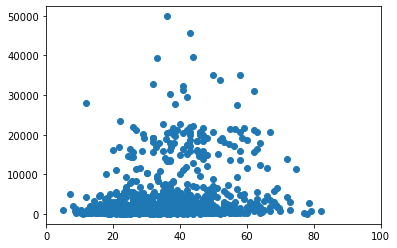

In [400]:
# There does not seem to be any relationship between fat and sales. "Fatty" dishes do not do better or worse than dishes with less fat
plt.scatter(data_2[['fat']],data_2[['sales']])
plt.xlim(0,100)
plt.show()

In [401]:
#We remove rows with NAs so that we can use the pearsonr function. The result is that there is not any significant correlation between fat and sales.
data_3=data_2.dropna()

pearsonr(data_3.sales,data_3.fat)

#The pearsonr correlation is the number on the left.

(0.07240279667630165, 0.029770846943873164)

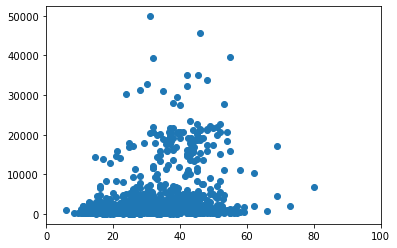

In [402]:
#The same goes for protein
plt.scatter(data_2[['proteins']],data_2[['sales']])
plt.xlim(0,100)
plt.show()

In [403]:
pearsonr(data_3.sales,data_3.proteins)

(0.24354565489518892, 1.242531358863818e-13)

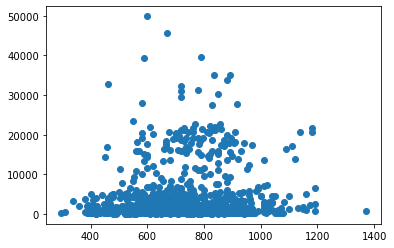

In [404]:
#Calories as well do not have an effect on sales.
plt.scatter(data_2[['calories']],data_2[['sales']])

plt.show()

### The amount of fat, protein or calories that a recipe contains seem to not be influencing sales.


## Cuisine


### Recipes that belong to the 'new_american' kind of cuisine sell the most, which is unsurprising, since the US is the most populous  out of all the countries that the firm operates. 'New American' cuisine is followed by italian, asian and mexican, despite the fact that the firm does not have a presence in Asia, Italy or Mexico' This tells us that the success of those kind cuisines is due to their popularity in general.


In [405]:
data_2[['cuisine','sales']].groupby(['cuisine']).sum().sort_values(['sales'],ascending=False)



,sales
cuisine,
new_american,1993327
italian,632352
asian,352248
mediterranean,180886
mexican,138342
central_south_american,118179
asian_fusion,75636
american,53363
french,49141


### We do observe that those cuisines are the ones that have the biggest number of recipes belonging to them. So the fact that they are responsible for the biggest amount of sales is not surprising. We thus cannot consider 'type of cuisine' to be an attribute that leads to higher sales for each recipe individually.

In [406]:
data_2[[groupedby,'cuisine']].groupby(['cuisine']).count().sort_values([groupedby],ascending=False)


,recipe_id
cuisine,
new_american,393
italian,154
asian,107
mexican,54
mediterranean,32
indian,24
asian_fusion,21
european,20
central_south_american,18


In [426]:
data_2[[groupedby,'cuisine']].groupby(['cuisine']).mean().sort_values([groupedby],ascending=False)

,recipe_id
cuisine,
greek,36841.500000
eastern_european,36051.000000
american,26817.750000
european,23941.500000
tex_mex,21867.500000
french,21676.250000
mexican,20501.500000
italian,20050.792208
indian,19881.916667


## Difficulty

### There is no point in searching about the attribute of difficulty since the only value shown is easy.

In [407]:

data.difficulty.unique()

array(['easy', nan], dtype=object)

## Cooking Time

In [408]:
data_2[['cooking_time','sales']].groupby(['cooking_time']).mean()




,sales
cooking_time,
time_level_3,4539.672131
time_level_4,4592.437363
time_level_5,4076.295515
time_level_6,5343.000000
time_level_7,1424.000000


### We see, that recipes that take a longer time to cook do not seem to be selling less on average.
### As we see in the next cell, from time level 5 and above, the observations are too few, thus we will further explore the relationship for time-levels 3 to 5.


In [409]:
data_2[['cooking_time','sales']].groupby(['cooking_time']).count()
#From time level 5 and above, the observations are two few to be considered significant

,sales
cooking_time,
time_level_3,61
time_level_4,455
time_level_5,379
time_level_6,4
time_level_7,2


In [410]:
#We split the date into the 'cooking time' categories.

data_tl_3=data_2.loc[data_2['cooking_time']=='time_level_3'].sales

data_tl_4=data_2.loc[data_2['cooking_time']=='time_level_4'].sales

data_tl_5=data_2.loc[data_2['cooking_time']=='time_level_5'].sales



### I apply a differences of mean t-test in order to make a conclusion more robustly. We see that the difference between the average sales of recipes that belong to different cooking-time levels seems not to be significant (the p-value is larger than 0.05). In other words, cooking time seems to not be a significant factor to sales.




In [411]:
ttest_ind(data_tl_4,data_tl_3)

Ttest_indResult(statistic=0.05561334451808831, pvalue=0.9556714438002714)

In [412]:
ttest_ind(data_tl_5,data_tl_4)

Ttest_indResult(statistic=-1.0878090549495976, pvalue=0.2769944289961496)

### The histogram shows significant overlap between sales from recipes with time_level_4 as cooking time and time_level_5 as cooking time.

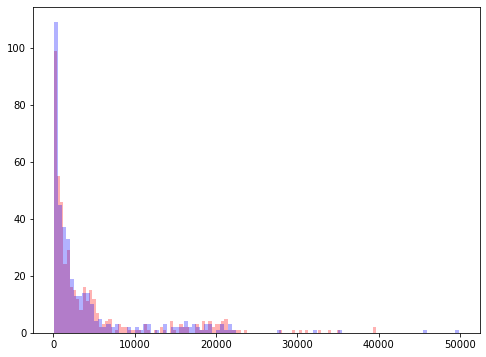

In [413]:
plt.figure(figsize=(8,6))
plt.hist(data_tl_4,alpha=0.3,bins=100,color='red')
plt.hist(data_tl_5,alpha=0.3,bins=100,color='blue')
plt.show()

## Dish Type

### The majority of the dishes are meat-type dishes.

In [414]:
data_2[['sales','dish_type']].groupby(['dish_type']).count()

,sales
dish_type,
fish,88
meat,465
veggie,348


### Meat dishes sell more on average than fish or veggie dishes. 


In [415]:
data_2[['sales','dish_type']].groupby(['dish_type']).mean()



,sales
dish_type,
fish,1890.727273
meat,6382.150538
veggie,2303.250000


### I apply a t-test as we did before. The result is a p-value smaller than 0.05. There is a statistically significant difference in average sales between veggie dishes and meat dishes. We thus conclude that meat dishes are more succesfull than veggie dishes.
### Due to the low sample size of fish dishes, we cannot reject the null hypothesis. In other words we cannot say with certainty that meat dishes are more successful than fish dishes, even though it seems that this is likely the case.


In [416]:

data_meat=data_2.loc[data_2['dish_type']=='veggie'].sales

data_veggie=data_2.loc[data_2['dish_type']=='meat'].sales

data_fish=data_2.loc[data_2['dish_type']=='fish'].sales

In [417]:
ttest_ind(data_meat,data_veggie)

Ttest_indResult(statistic=-8.491732386443175, pvalue=9.650349818686808e-17)

In [418]:
ttest_ind(data_meat,data_fish)

Ttest_indResult(statistic=0.9206514602269965, pvalue=0.3577438766245027)

## Heat

### Even though we see that dishes that do not need heating sell more on average, since the vast majority of dishes are such dishes, we cannot conclude with certainty that heat level is an important factor.


In [419]:
data_2[['heat_level',groupedby]].groupby('heat_level').count().rename(columns={groupedby:'count'})

,count
heat_level,
high,31
no_heat,771
non_spicy,2
optional_heat,97


In [420]:
data_2[['sales','heat_level']].groupby(['heat_level']).mean().rename(columns={'sales':'average sales'})


,average sales
heat_level,
high,1983.903226
no_heat,4578.937743
non_spicy,252.000000
optional_heat,3538.649485


## Product type

### 2-person meals seem to be doing better than family meals.

In [421]:
data_2[['sales','product_type']].groupby(['product_type']).mean()

,sales
product_type,
2 person,7214.533040
add_on,53.000000
family,1480.188341


In [422]:
data_2[['sales','product_type']].groupby(['product_type']).count().rename(columns={'sales':'count'})

,count
product_type,
2 person,454
add_on,1
family,446


In [423]:
data_2_person=data_2.loc[data_2['product_type']=='2 person'].sales

data_family=data_2.loc[data_2['product_type']=='family'].sales

### The overlapping histogram of sales by 2-person recipes and sales by family recipes shows that 2-person recipes tend to bring higher sales.

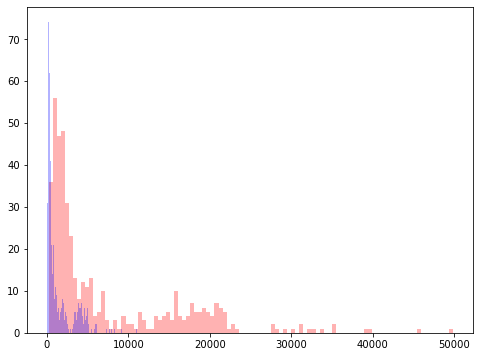

In [424]:
plt.figure(figsize=(8,6))
plt.hist(data_2_person,alpha=0.3,bins=100,color='red')
plt.hist(data_family,alpha=0.3,bins=100,color='blue')
plt.show()

### The same result can be established by the t-test. We can safely conclude that 2-person meals sell more on average than famly meals.

In [425]:
ttest_ind(data_2_person,data_family)

Ttest_indResult(statistic=13.931588171288789, pvalue=4.378209775816934e-40)